In [ ]:
!ls -lh /data1/meta_midi_dataset/*.csv

In [44]:
import json
import sys

with open("../environment.json", "r") as f:
    env = json.load(f)
sys.path.append("..")

In [45]:
import os
import pandas as pd

df_MMD_spotify_all = pd.read_csv(os.path.join(env["DATASET_PATH"], "MMD_spotify_all.csv"))
df_MMD_spotify_all.head()

,spotify_track_id,title,artist,artist_id,album_title,album_id,date,acousticness,danceability,duration_ms,...,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,album_jacket_url
0,5n3es2C6R47r4WGfmYL9vZ,I'm Outta Love,PMC All-Stars,0yHtl7OPYS3CaDLsOzFFw0,Diva's,5JkoSFwNn5DQ1xi0lzTxKQ,2010-02-16,0.151,0.747,249333,...,0.000041,10,0.0823,-9.102,0,0.0675,119.454,4,0.513,https://i.scdn.co/image/ab67616d0000b2730aee8e...
1,65yDyFGWY1nAAEIoPoGSL6,Volare (Karaoke Version) [Originally Performed...,Zoom Karaoke,3Nr8EAmJ6b95ydy2o8h5vd,"Zoom Karaoke Party, Vol. 195",3cLXKzIMORl6KHGMYSs8XZ,2014-09-10,0.647,0.690,182491,...,0.947000,9,0.1560,-12.499,1,0.0399,128.967,4,0.477,https://i.scdn.co/image/ab67616d0000b27353d0db...
2,6WRwxMiwig6czraGVt3xEB,Volare,PMC All-Stars,0yHtl7OPYS3CaDLsOzFFw0,Dean Martin: Covered (PMC All-Star Tribute To ...,0oDleNYiDVIbROzDXT4Icy,2010-02-02,0.694,0.736,183520,...,0.000021,6,0.0668,-15.500,0,0.0389,130.927,4,0.537,https://i.scdn.co/image/ab67616d0000b273468101...
3,6X72YoEcN8Iuw4e70NMb1V,Volare (Karaoke Version) [in the Style of Dean...,Goldsound Karaoke,4A4BDuc54Pgl2n3ZRVMD5n,In the Style of Dean Martin - Vol. 1,03gSD7wpRvOKEDFARFYlug,2011-07-12,0.234,0.719,183520,...,0.893000,6,0.0613,-19.212,0,0.0488,130.968,4,0.570,https://i.scdn.co/image/ab67616d0000b2734aff6b...
4,1Yg4ZDCR9z6AEHwEuWqNAe,Volare,The Hit Nation,5wz3xBeUET6xM1yi9tHfRg,A Tribute to Sinatra & Friends,62zaIwec6PQQ3dYPw8SkQ6,2012-03-13,0.493,0.676,178840,...,0.000167,6,0.5190,-10.491,0,0.0286,129.121,4,0.429,https://i.scdn.co/image/ab67616d0000b273123e9f...


In [46]:
from src.datasets import MMD_audio_matches, MMD_md5_metainfo


MMD_md5_metainfo.head()

,Unnamed: 0,md5,artist,title,genre
0,0,be51e8259904879e561850e140e997dd,Henry Thomas Smart,'Tis break of day,romantic
1,1,272257791018b3c151029b49734b26a6,Fabio Fresi,Ave Maria,modern
2,2,2596615b7dc995ff733995786fb6dc64,Heinrich Schütz,Lukaspassion,baroque
3,3,17b545f91caf271920727ee61f21e494,Johann Sebastian Bach,"An Wasserflüssen Babylon, BWV 267",baroque
4,4,4f8ee1160e87907d56d864b5dd75b61a,Heinrich Schütz,Matthäuspassion,baroque


<AxesSubplot:>

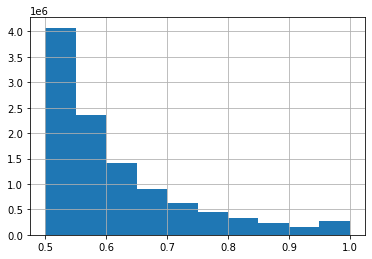

In [47]:
MMD_audio_matches.score.hist()

In [48]:
len(MMD_audio_matches[MMD_audio_matches.score > 0.6]) / len(MMD_audio_matches)

0.4049309423365245

In [49]:
MMD_audio_matches[MMD_audio_matches.score > 0.6].head()

,md5,score,sid
1,a8ab220d3e771f14994bcb6104a6e733,0.910470,65yDyFGWY1nAAEIoPoGSL6
2,a8ab220d3e771f14994bcb6104a6e733,0.743186,6WRwxMiwig6czraGVt3xEB
3,a8ab220d3e771f14994bcb6104a6e733,0.775063,6X72YoEcN8Iuw4e70NMb1V
4,a8ab220d3e771f14994bcb6104a6e733,0.675244,1Yg4ZDCR9z6AEHwEuWqNAe
6,a8ab220d3e771f14994bcb6104a6e733,0.600926,4gXc4d1FhjNxg77goA4Btj


## Merge

In [50]:
df_MMD_spotify_all.columns

Index(['spotify_track_id', 'title', 'artist', 'artist_id', 'album_title',
       'album_id', 'date', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence',
       'album_jacket_url'],
      dtype='object')

In [51]:
MMD_md5_metainfo.columns

Index(['Unnamed: 0', 'md5', 'artist', 'title', 'genre'], dtype='object')

In [52]:
from src.datasets import MMD_audio_matches, MMD_md5_metainfo

songs = pd.merge(
    MMD_audio_matches[MMD_audio_matches.score > 0.6].sort_values(by=["score"], ascending=False)[["md5", "sid"]].drop_duplicates("md5", keep="first"),
    MMD_md5_metainfo[["md5", "artist", "title", "genre"]])

songs.columns = ["md5", "spotify_track_id", "midi_artist", "midi_title", "scraped_genre"]
songs.head()

,md5,spotify_track_id,midi_artist,midi_title,scraped_genre
0,b8064bf6384a362b7560ef6249f5c1f9,2slHnQBLSSrOprDF2utfED,"Satie, Erik",3 Gymnopedies no.1,classical
1,d6eac6739a3802c80620cca517bb8df5,1HeQiwFIcoiWDuXfoQOP7S,Detroit Spinners,Working My Way Back To You,pop
2,e5921fe382b4db849931b6bc7d3e4e52,6DvUMnHTqknkYxUWACaZgC,"Paradis, Maria Theresia von",Sicilienne,classical
3,ef226881e32259c6c541410ac070874a,4y9fCqAzTuPzeJkU4uFxR5,Hole,Malibu,pop
4,1420bfd20ccff17031d0d15907c1ebaa,18MlGPFYkq9ugGS1xRrfcL,Lil Wayne,Right Above It,hip-hop-rap


In [53]:
songs_spotify_all = pd.merge(songs, df_MMD_spotify_all, on="spotify_track_id")
print(songs_spotify_all.shape)
songs_spotify_all.head()

(8445, 25)


,md5,spotify_track_id,midi_artist,midi_title,scraped_genre,title,artist,artist_id,album_title,album_id,...,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,album_jacket_url
0,d6eac6739a3802c80620cca517bb8df5,1HeQiwFIcoiWDuXfoQOP7S,Detroit Spinners,Working My Way Back To You,pop,Working My Way Back to You (Karaoke Version) -...,Dohn Joe,6p2SwRrKME2QzT2wzFIRzm,"50 Greatest Karaoke Hits, Vol. 96 (Karaoke Ver...",10AmD6sYR3V0FnSSPoycrz,...,0.857,0,0.427,-7.579,1,0.0343,130.066,4,0.799,https://i.scdn.co/image/ab67616d0000b2735088a9...
1,86979a691472d5e8cd4610ceff94d2fe,1HeQiwFIcoiWDuXfoQOP7S,Detroit Spinners,Working My Way Back To You (Karaoke),dance-eletric,Working My Way Back to You (Karaoke Version) -...,Dohn Joe,6p2SwRrKME2QzT2wzFIRzm,"50 Greatest Karaoke Hits, Vol. 96 (Karaoke Ver...",10AmD6sYR3V0FnSSPoycrz,...,0.857,0,0.427,-7.579,1,0.0343,130.066,4,0.799,https://i.scdn.co/image/ab67616d0000b2735088a9...
2,ae9525a511def30a30dff3cea768704e,1HeQiwFIcoiWDuXfoQOP7S,Spinners,Working My Way Back to You,rnb-soul,Working My Way Back to You (Karaoke Version) -...,Dohn Joe,6p2SwRrKME2QzT2wzFIRzm,"50 Greatest Karaoke Hits, Vol. 96 (Karaoke Ver...",10AmD6sYR3V0FnSSPoycrz,...,0.857,0,0.427,-7.579,1,0.0343,130.066,4,0.799,https://i.scdn.co/image/ab67616d0000b2735088a9...
3,1420bfd20ccff17031d0d15907c1ebaa,18MlGPFYkq9ugGS1xRrfcL,Lil Wayne,Right Above It,hip-hop-rap,Right Above It - Instrumental,James Jones Band,4AVzl6ldhGOg9QSF06VhIf,An Instrumental Tribute to Lil Wayne,3ryYfa8G4N6jN9AQWkWtq4,...,0.808,3,0.150,-6.349,0,0.0324,149.898,4,0.129,https://i.scdn.co/image/ab67616d0000b27357d0bf...
4,1f9d6cd5c4f99de6cb4c1e1bdc6b716f,18MlGPFYkq9ugGS1xRrfcL,Gamma Ray,The Silence (Live),metal,Right Above It - Instrumental,James Jones Band,4AVzl6ldhGOg9QSF06VhIf,An Instrumental Tribute to Lil Wayne,3ryYfa8G4N6jN9AQWkWtq4,...,0.808,3,0.150,-6.349,0,0.0324,149.898,4,0.129,https://i.scdn.co/image/ab67616d0000b27357d0bf...


In [54]:
new_song_df = songs_spotify_all[songs_spotify_all.columns[:11].values]
spotify_df = songs_spotify_all[songs_spotify_all.columns[11:].values]

In [55]:
new_song_df.columns

Index(['md5', 'spotify_track_id', 'midi_artist', 'midi_title', 'scraped_genre',
       'title', 'artist', 'artist_id', 'album_title', 'album_id', 'date'],
      dtype='object')

In [67]:
any(new_song_df.date.isna())

False

In [71]:
from datetime import datetime

def to_date(fmt: str):
    try:
        if fmt.count("-") > 1:
            d = datetime.strptime(fmt, "%Y-%m-%d")
        elif fmt.count("-") == 1:
            d = datetime.strptime(fmt, "%Y-%m")
        else:
            d = datetime.strptime(fmt, "%Y")
    except:
        d = datetime.now()
    return d.date()

list(map(to_date, new_song_df.date))

[datetime.date(2014, 2, 14),
 datetime.date(2014, 2, 14),
 datetime.date(2014, 2, 14),
 datetime.date(2013, 6, 4),
 datetime.date(2013, 6, 4),
 datetime.date(2013, 6, 4),
 datetime.date(2006, 1, 1),
 datetime.date(2014, 3, 25),
 datetime.date(2017, 5, 17),
 datetime.date(2013, 4, 15),
 datetime.date(2017, 12, 13),
 datetime.date(2020, 2, 29),
 datetime.date(2020, 2, 29),
 datetime.date(2014, 2, 7),
 datetime.date(2013, 9, 13),
 datetime.date(2013, 8, 31),
 datetime.date(2013, 8, 31),
 datetime.date(2013, 8, 31),
 datetime.date(2013, 9, 6),
 datetime.date(2015, 8, 28),
 datetime.date(2000, 1, 1),
 datetime.date(2014, 3, 27),
 datetime.date(2014, 1, 1),
 datetime.date(2005, 11, 1),
 datetime.date(2016, 11, 19),
 datetime.date(2016, 11, 19),
 datetime.date(2018, 7, 23),
 datetime.date(2019, 6, 1),
 datetime.date(2014, 3, 14),
 datetime.date(2020, 7, 7),
 datetime.date(2014, 5, 14),
 datetime.date(2018, 5, 17),
 datetime.date(2015, 9, 15),
 datetime.date(2015, 10, 9),
 datetime.date(2019, 

In [72]:
new_song_df["date"] = list(map(to_date, new_song_df.date))
new_song_df.head()

/tmp/ipykernel_29106/2521061167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_song_df["date"] = list(map(to_date, new_song_df.date))


,md5,spotify_track_id,midi_artist,midi_title,scraped_genre,title,artist,artist_id,album_title,album_id,date
0,d6eac6739a3802c80620cca517bb8df5,1HeQiwFIcoiWDuXfoQOP7S,Detroit Spinners,Working My Way Back To You,pop,Working My Way Back to You (Karaoke Version) -...,Dohn Joe,6p2SwRrKME2QzT2wzFIRzm,"50 Greatest Karaoke Hits, Vol. 96 (Karaoke Ver...",10AmD6sYR3V0FnSSPoycrz,2014-02-14
1,86979a691472d5e8cd4610ceff94d2fe,1HeQiwFIcoiWDuXfoQOP7S,Detroit Spinners,Working My Way Back To You (Karaoke),dance-eletric,Working My Way Back to You (Karaoke Version) -...,Dohn Joe,6p2SwRrKME2QzT2wzFIRzm,"50 Greatest Karaoke Hits, Vol. 96 (Karaoke Ver...",10AmD6sYR3V0FnSSPoycrz,2014-02-14
2,ae9525a511def30a30dff3cea768704e,1HeQiwFIcoiWDuXfoQOP7S,Spinners,Working My Way Back to You,rnb-soul,Working My Way Back to You (Karaoke Version) -...,Dohn Joe,6p2SwRrKME2QzT2wzFIRzm,"50 Greatest Karaoke Hits, Vol. 96 (Karaoke Ver...",10AmD6sYR3V0FnSSPoycrz,2014-02-14
3,1420bfd20ccff17031d0d15907c1ebaa,18MlGPFYkq9ugGS1xRrfcL,Lil Wayne,Right Above It,hip-hop-rap,Right Above It - Instrumental,James Jones Band,4AVzl6ldhGOg9QSF06VhIf,An Instrumental Tribute to Lil Wayne,3ryYfa8G4N6jN9AQWkWtq4,2013-06-04
4,1f9d6cd5c4f99de6cb4c1e1bdc6b716f,18MlGPFYkq9ugGS1xRrfcL,Gamma Ray,The Silence (Live),metal,Right Above It - Instrumental,James Jones Band,4AVzl6ldhGOg9QSF06VhIf,An Instrumental Tribute to Lil Wayne,3ryYfa8G4N6jN9AQWkWtq4,2013-06-04


In [40]:
print(new_song_df.head().to_markdown(index=False))

| md5                              | spotify_track_id       | midi_artist      | midi_title                           | scraped_genre   | title                                                                                   | artist           | artist_id              | album_title                                         | album_id               | date       |
|:---------------------------------|:-----------------------|:-----------------|:-------------------------------------|:----------------|:----------------------------------------------------------------------------------------|:-----------------|:-----------------------|:----------------------------------------------------|:-----------------------|:-----------|
| d6eac6739a3802c80620cca517bb8df5 | 1HeQiwFIcoiWDuXfoQOP7S | Detroit Spinners | Working My Way Back To You           | pop             | Working My Way Back to You (Karaoke Version) - Originally Performed By The Four Seasons | Dohn Joe         | 6p2SwRrKME2QzT2wzFIRzm | 

In [42]:
spotify_df["spotify_track_id"] = songs_spotify_all["spotify_track_id"].values
spotify_df["md5"] = songs_spotify_all["md5"].values
spotify_df.head()

/tmp/ipykernel_29106/2132898578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df["spotify_track_id"] = songs_spotify_all["spotify_track_id"].values
/tmp/ipykernel_29106/2132898578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_df["md5"] = songs_spotify_all["md5"].values


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,album_jacket_url,spotify_track_id,md5
0,0.6160,0.542,165068,0.480,0.857,0,0.427,-7.579,1,0.0343,130.066,4,0.799,https://i.scdn.co/image/ab67616d0000b2735088a9...,1HeQiwFIcoiWDuXfoQOP7S,d6eac6739a3802c80620cca517bb8df5
1,0.6160,0.542,165068,0.480,0.857,0,0.427,-7.579,1,0.0343,130.066,4,0.799,https://i.scdn.co/image/ab67616d0000b2735088a9...,1HeQiwFIcoiWDuXfoQOP7S,86979a691472d5e8cd4610ceff94d2fe
2,0.6160,0.542,165068,0.480,0.857,0,0.427,-7.579,1,0.0343,130.066,4,0.799,https://i.scdn.co/image/ab67616d0000b2735088a9...,1HeQiwFIcoiWDuXfoQOP7S,ae9525a511def30a30dff3cea768704e
3,0.0179,0.345,270453,0.466,0.808,3,0.150,-6.349,0,0.0324,149.898,4,0.129,https://i.scdn.co/image/ab67616d0000b27357d0bf...,18MlGPFYkq9ugGS1xRrfcL,1420bfd20ccff17031d0d15907c1ebaa
4,0.0179,0.345,270453,0.466,0.808,3,0.150,-6.349,0,0.0324,149.898,4,0.129,https://i.scdn.co/image/ab67616d0000b27357d0bf...,18MlGPFYkq9ugGS1xRrfcL,1f9d6cd5c4f99de6cb4c1e1bdc6b716f


In [43]:
print(spotify_df.head().to_markdown(index=False))

|   acousticness |   danceability |   duration_ms |   energy |   instrumentalness |   key |   liveness |   loudness |   mode |   speechiness |   tempo |   time_signature |   valence | album_jacket_url                                                 | spotify_track_id       | md5                              |
|---------------:|---------------:|--------------:|---------:|-------------------:|------:|-----------:|-----------:|-------:|--------------:|--------:|-----------------:|----------:|:-----------------------------------------------------------------|:-----------------------|:---------------------------------|
|         0.616  |          0.542 |        165068 |    0.48  |              0.857 |     0 |      0.427 |     -7.579 |      1 |        0.0343 | 130.066 |                4 |     0.799 | https://i.scdn.co/image/ab67616d0000b2735088a95db05145588de8d7dd | 1HeQiwFIcoiWDuXfoQOP7S | d6eac6739a3802c80620cca517bb8df5 |
|         0.616  |          0.542 |        165068 |    0.48  |     